# QNN Grid Search Results Analysis

**Professional visualization of Quantum Neural Network grid search results.**


In [69]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects

# ===========================================
# PROFESSIONAL STYLE CONFIGURATION
# ===========================================

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Times New Roman'],
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'mathtext.fontset': 'cm',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.linewidth': 1.2,
    'axes.edgecolor': '#333333',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
})

# Custom gradient colormaps
GRADIENT_TEAL = LinearSegmentedColormap.from_list('teal_gradient', 
    ['#E0F7FA', '#00ACC1', '#006064'], N=256)
GRADIENT_PURPLE = LinearSegmentedColormap.from_list('purple_gradient', 
    ['#F3E5F5', '#9C27B0', '#4A148C'], N=256)
GRADIENT_ORANGE = LinearSegmentedColormap.from_list('orange_gradient', 
    ['#FFF3E0', '#FF9800', '#E65100'], N=256)

# Color palette
COLORS = {
    'primary': '#1976D2',
    'danger': '#D32F2F',
    'dark': '#263238',
}

print("Style loaded.")


Style loaded.


In [70]:
# ===========================================
# LOAD RESULTS
# ===========================================

RESULTS_FILE = "qnn_grid_search_results_20251229_153608.pkl"  # <-- CHANGE THIS

with open(RESULTS_FILE, "rb") as f:
    results = pickle.load(f)

# Create sorted dataframe (descending by test accuracy)
rows = []
for k, v in results.items():
    rows.append({
        'config': k,
        'test_accuracy': v['test_accuracy'],
        'roc_auc': v['roc_auc'],
        'avg_epoch_time': v.get('avg_epoch_time', None),
    })

df = pd.DataFrame(rows).sort_values('test_accuracy', ascending=False).reset_index(drop=True)

print(f"Loaded {len(df)} configurations from {RESULTS_FILE}")
display(df)


Loaded 24 configurations from qnn_grid_search_results_20251229_153608.pkl


,config,test_accuracy,roc_auc,avg_epoch_time
0,3_feature_map_qnn1_variational_ansatz2_observa...,0.817025,0.864554,18.921070
1,4_feature_map_qnn1_variational_ansatz2_observa...,0.806278,0.852840,21.656567
2,4_feature_map_qnn1_variational_ansatz2_observa...,0.802319,0.862184,22.793257
3,3_feature_map_qnn1_variational_ansatz2_observa...,0.801753,0.854273,17.193864
4,3_feature_map_qnn2_variational_ansatz2_observa...,0.801753,0.844556,19.382047
5,3_feature_map_qnn1_variational_ansatz1_observa...,0.800339,0.856936,11.780161
6,3_feature_map_qnn2_variational_ansatz2_observa...,0.793269,0.850534,19.917166
7,3_feature_map_qnn1_variational_ansatz2_observa...,0.792421,0.862993,19.572167
8,4_feature_map_qnn2_variational_ansatz2_observa...,0.789027,0.844953,29.241173
9,4_feature_map_qnn1_variational_ansatz2_observa...,0.787048,0.849962,22.414026


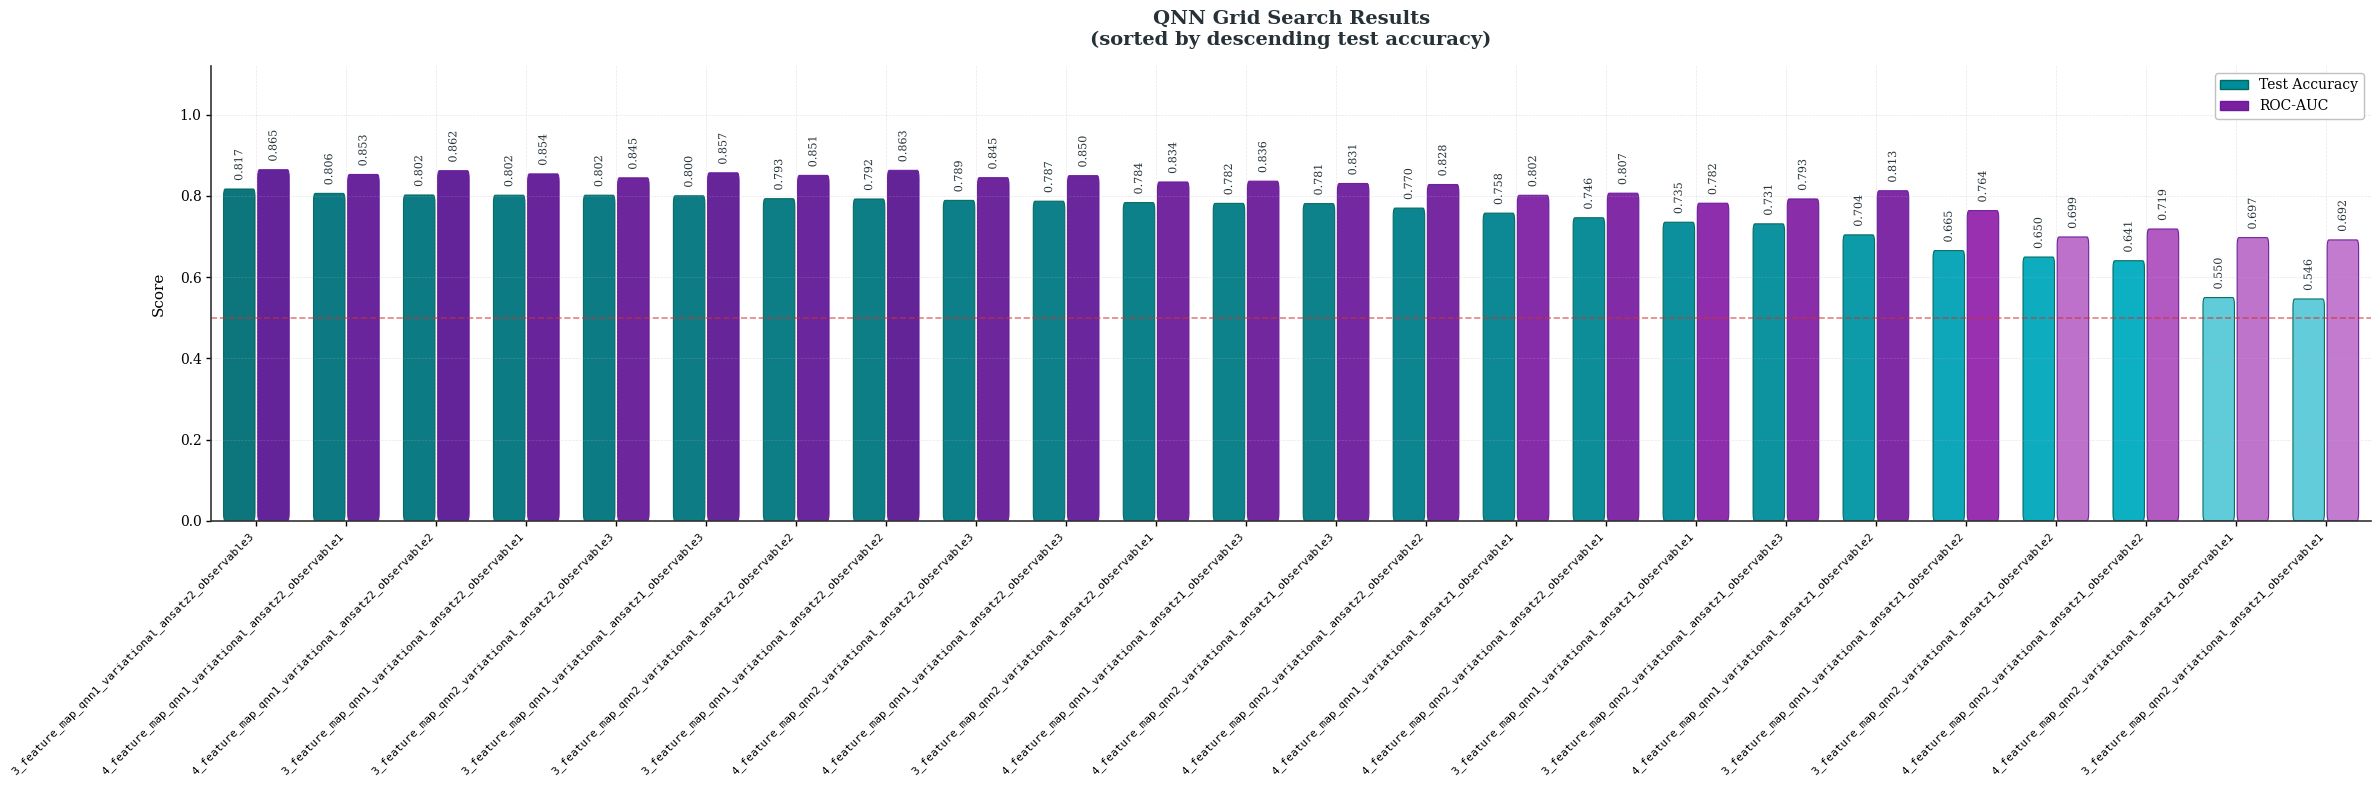

In [71]:
# ===========================================
# GROUPED VERTICAL BAR CHART
# 2 bars per config: Test Accuracy, ROC-AUC
# ===========================================

fig, ax = plt.subplots(figsize=(max(14, len(df) * 1.0), 8))
fig.patch.set_facecolor('white')

n = len(df)
x = np.arange(n)
bar_width = 0.35
gap = 0.03

# Draw grouped bars with FancyBboxPatch
metrics = [
    ('Test Accuracy', df['test_accuracy'].values, GRADIENT_TEAL, '#00695C', '.3f'),
    ('ROC-AUC', df['roc_auc'].values, GRADIENT_PURPLE, '#6A1B9A', '.3f'),
]

for m_idx, (label, values, cmap, edge_color, fmt) in enumerate(metrics):
    # Calculate bar positions (center the 2 bars)
    offset = (m_idx - 0.5) * (bar_width + gap)
    
    for i, (pos, val) in enumerate(zip(x, values)):
        if pd.isna(val):
            continue
        
        # Color based on value
        val_range = values.max() - values.min()
        norm_val = (val - values.min()) / val_range if val_range > 0 else 0.5
        color = cmap(0.3 + 0.6 * norm_val)
        
        # Draw vertical bar
        fancy_box = FancyBboxPatch(
            (pos + offset - bar_width/2, 0), bar_width, val,
            boxstyle="round,rounding_size=0.02,pad=0",
            facecolor=color,
            edgecolor=edge_color,
            linewidth=0.8,
            alpha=0.95
        )
        ax.add_patch(fancy_box)
        
        # Value label on top
        label_text = ax.text(pos + offset, val + 0.02, f'{val:{fmt}}',
                             ha='center', va='bottom', fontsize=8, fontweight='medium',
                             color=COLORS['dark'], rotation=90)
        label_text.set_path_effects([path_effects.withStroke(linewidth=1.5, foreground='white')])

# Create legend patches
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(facecolor=GRADIENT_TEAL(0.7), edgecolor='#00695C', label='Test Accuracy'),
    mpatches.Patch(facecolor=GRADIENT_PURPLE(0.7), edgecolor='#6A1B9A', label='ROC-AUC'),
]

# Styling
ax.set_xticks(x)
ax.set_xticklabels(df['config'].values, rotation=45, ha='right', fontsize=8, fontfamily='monospace')
ax.set_ylabel('Score', fontsize=11, fontweight='medium', labelpad=10)
ax.set_title('QNN Grid Search Results\n(sorted by descending test accuracy)', 
             fontsize=14, fontweight='bold', color=COLORS['dark'], pad=15)

ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(0, 1.12)

# Random baseline
ax.axhline(y=0.5, color=COLORS['danger'], linestyle='--', linewidth=1.2, alpha=0.6, label='Random (0.5)')

# Legend
ax.legend(handles=legend_handles, loc='upper right', frameon=True, 
          facecolor='white', edgecolor='#BDBDBD', framealpha=0.95)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig('qnn_results_grouped.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()


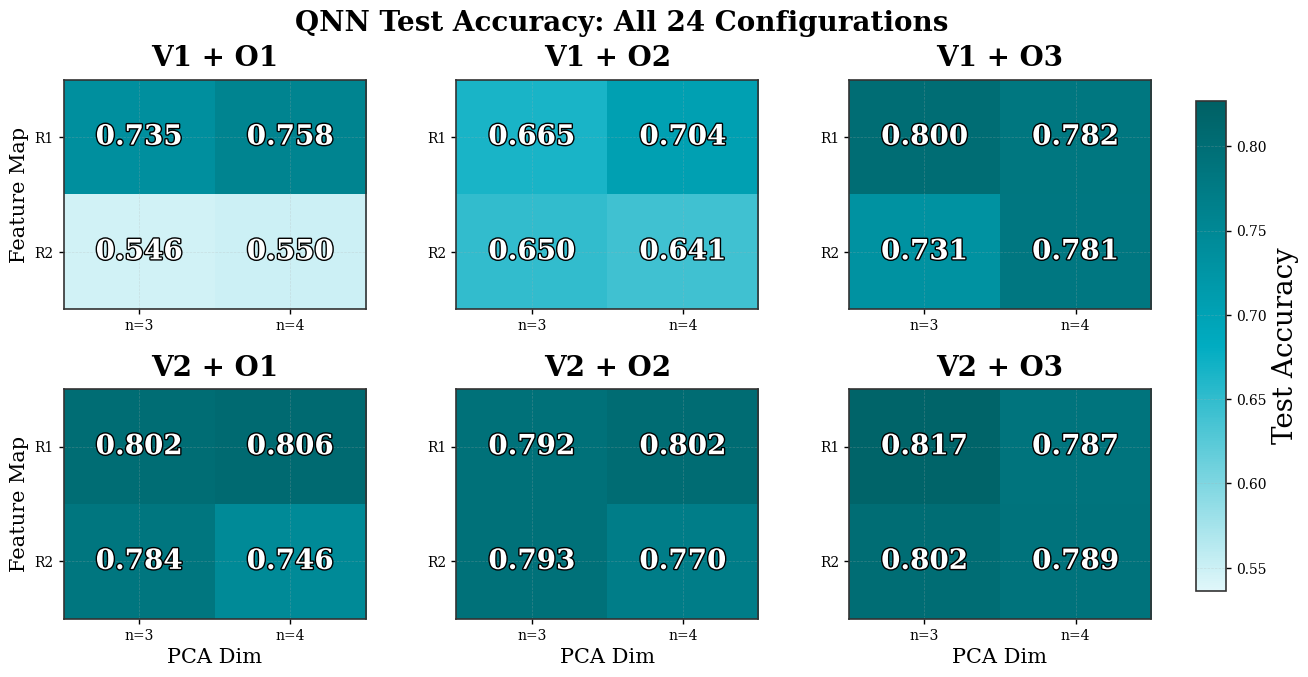

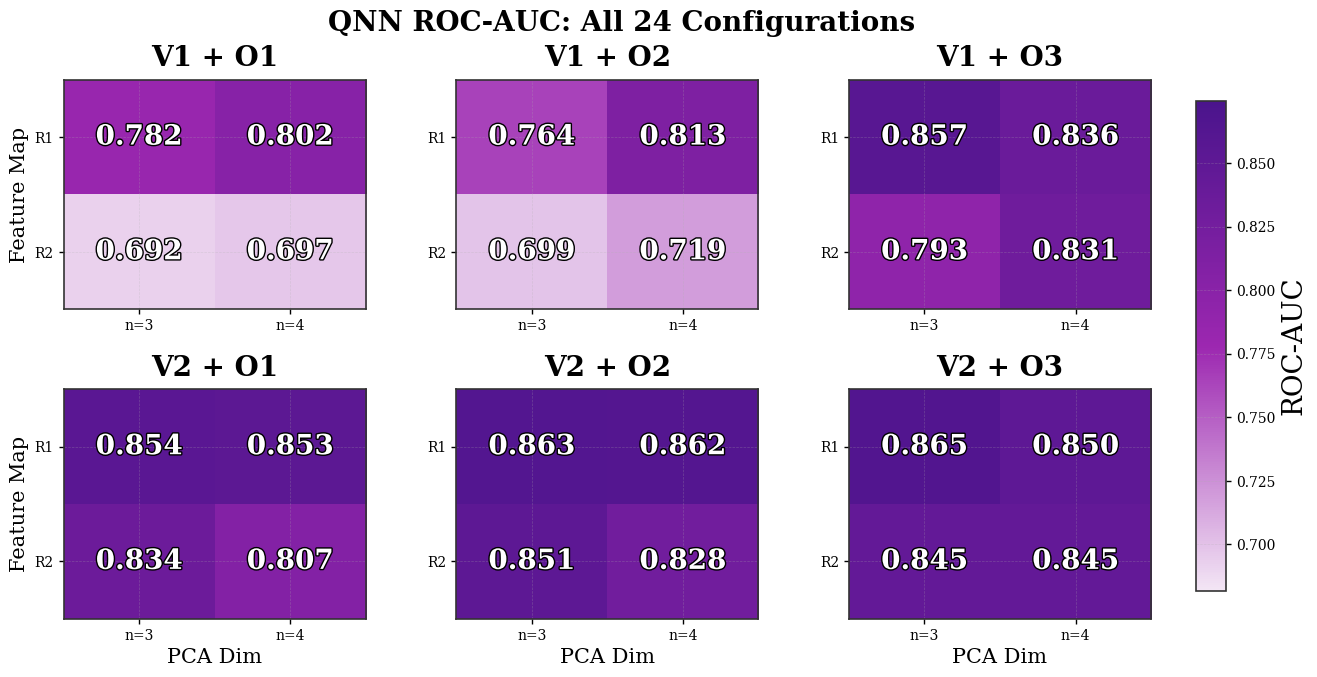

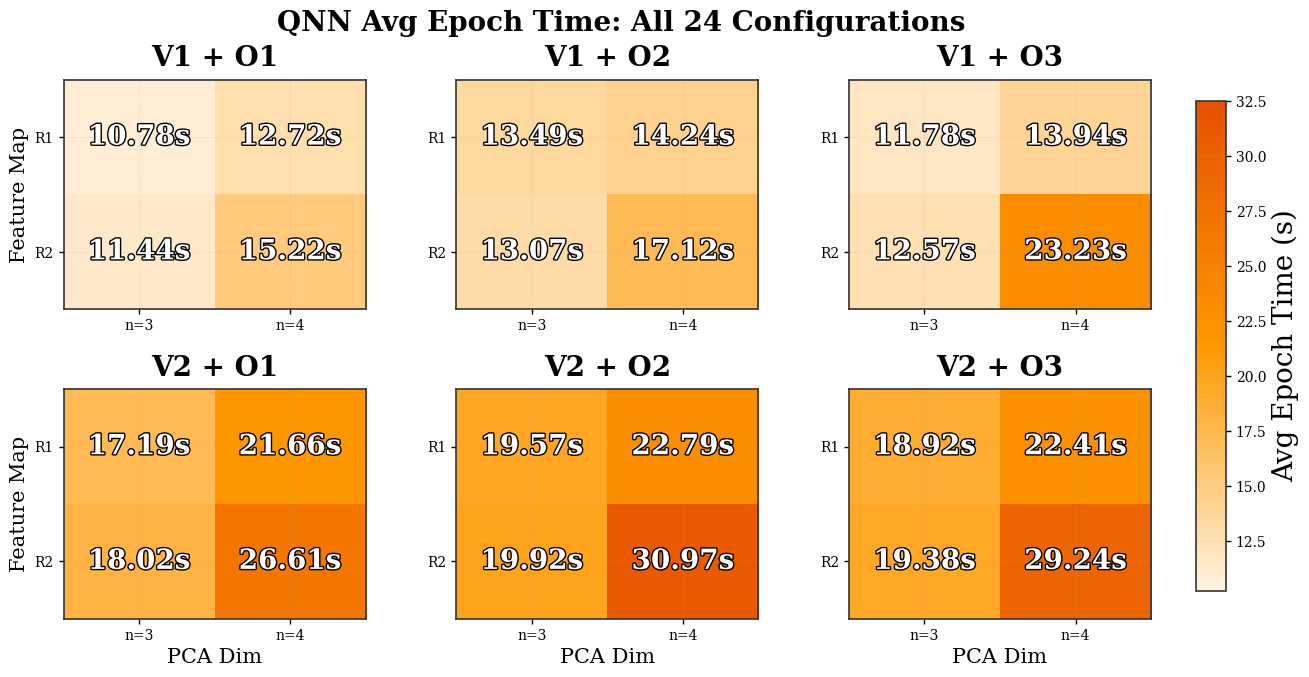


Legend:
  V1 = variational_ansatz1, V2 = variational_ansatz2
  O1 = observable1, O2 = observable2, O3 = observable3
  R1 = feature_map_qnn1, R2 = feature_map_qnn2


In [ ]:
# ===========================================
# FACETED HEATMAPS: ALL CONFIGURATIONS
# Rows = Ansätze, Cols = Observables
# Each cell = 2x2 heatmap (Feature Map × PCA Dim)
# ===========================================

# Reload results to get full hyperparameter info
with open(RESULTS_FILE, "rb") as f:
    results_full = pickle.load(f)

# Build extended dataframe with all hyperparameters
rows_full = []
for k, v in results_full.items():
    rows_full.append({
        'config': k,
        'pca_dim': v.get('PCA_DIM'),
        'embedding': v.get('EMBEDDING_UNITARY'),
        'ansatz': v.get('VARIATIONAL_ANSWATZ'),
        'observable': v.get('OBSERVABLE'),
        'test_accuracy': v['test_accuracy'],
        'roc_auc': v['roc_auc'],
        'avg_epoch_time': v.get('avg_epoch_time', None),
    })

df_full = pd.DataFrame(rows_full)

# Short name mappings
FM_MAP = {'feature_map_qnn1': 'R1', 'feature_map_qnn2': 'R2'}
ANS_MAP = {'variational_ansatz1': 'U1', 'variational_ansatz2': 'U2'}
OBS_MAP = {'observable1': 'O1', 'observable2': 'O2', 'observable3': 'O3'}

df_full['fm_short'] = df_full['embedding'].map(FM_MAP)
df_full['ans_short'] = df_full['ansatz'].map(ANS_MAP)
df_full['obs_short'] = df_full['observable'].map(OBS_MAP)

# Get unique sorted values
ansatzes = sorted(df_full['ansatz'].unique())
observables = sorted(df_full['observable'].unique())
pca_dims = sorted(df_full['pca_dim'].unique())
embeddings = sorted(df_full['embedding'].unique())

# ============================================
# FIGURE 1: Test Accuracy
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
fig.patch.set_facecolor('white')

vmin_acc = df_full['test_accuracy'].min() - 0.01
vmax_acc = df_full['test_accuracy'].max() + 0.01

for row_idx, ansatz in enumerate(ansatzes):
    for col_idx, observable in enumerate(observables):
        ax = axes[row_idx, col_idx]
        
        subset = df_full[(df_full['ansatz'] == ansatz) & (df_full['observable'] == observable)]
        pivot = subset.pivot_table(values='test_accuracy', index='fm_short', columns='pca_dim', aggfunc='first')
        pivot = pivot.reindex(index=[FM_MAP[e] for e in embeddings], columns=pca_dims)
        
        im = ax.imshow(pivot.values, cmap=GRADIENT_TEAL, aspect='auto', vmin=vmin_acc, vmax=vmax_acc)
        
        ax.set_xticks(range(len(pca_dims)))
        ax.set_yticks(range(len(embeddings)))
        ax.set_xticklabels([f'n={d}' for d in pca_dims])
        ax.set_yticklabels([FM_MAP[e] for e in embeddings])
        
        for i in range(len(embeddings)):
            for j in range(len(pca_dims)):
                val = pivot.values[i, j]
                if not np.isnan(val):
                    text = ax.text(j, i, f'{val:.3f}', ha='center', va='center',
                                  fontsize=20, fontweight='bold', color='white')
                    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground='black')])
        
        ans_label = ANS_MAP[ansatz]
        obs_label = OBS_MAP[observable]
        ax.set_title(f'{ans_label} + {obs_label}', fontsize=20, fontweight='bold', pad=10)
        
        if row_idx == 1:
            ax.set_xlabel('PCA Dim', fontsize=15)
        if col_idx == 0:
            ax.set_ylabel('Feature Map', fontsize=15)

plt.subplots_adjust(right=0.85, wspace=0.3, hspace=0.35)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Test Accuracy', fontsize=20)

fig.suptitle('QNN Test Accuracy: All 24 Configurations \n', 
             fontsize=20, fontweight='bold')
plt.savefig('qnn_heatmaps_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# FIGURE 2: ROC-AUC
# ============================================
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 7))
fig2.patch.set_facecolor('white')

vmin_roc = df_full['roc_auc'].min() - 0.01
vmax_roc = df_full['roc_auc'].max() + 0.01

for row_idx, ansatz in enumerate(ansatzes):
    for col_idx, observable in enumerate(observables):
        ax = axes2[row_idx, col_idx]
        
        subset = df_full[(df_full['ansatz'] == ansatz) & (df_full['observable'] == observable)]
        pivot = subset.pivot_table(values='roc_auc', index='fm_short', columns='pca_dim', aggfunc='first')
        pivot = pivot.reindex(index=[FM_MAP[e] for e in embeddings], columns=pca_dims)
        
        im2 = ax.imshow(pivot.values, cmap=GRADIENT_PURPLE, aspect='auto', vmin=vmin_roc, vmax=vmax_roc)
        
        ax.set_xticks(range(len(pca_dims)))
        ax.set_yticks(range(len(embeddings)))
        ax.set_xticklabels([f'n={d}' for d in pca_dims])
        ax.set_yticklabels([FM_MAP[e] for e in embeddings])
        
        for i in range(len(embeddings)):
            for j in range(len(pca_dims)):
                val = pivot.values[i, j]
                if not np.isnan(val):
                    text = ax.text(j, i, f'{val:.3f}', ha='center', va='center',
                                  fontsize=20, fontweight='bold', color='white')
                    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground='black')])
        
        ans_label = ANS_MAP[ansatz]
        obs_label = OBS_MAP[observable]
        ax.set_title(f'{ans_label} + {obs_label}', fontsize=20, fontweight='bold', pad=10)
        
        if row_idx == 1:
            ax.set_xlabel('PCA Dim', fontsize=15)
        if col_idx == 0:
            ax.set_ylabel('Feature Map', fontsize=15)

plt.subplots_adjust(right=0.85, wspace=0.3, hspace=0.35)
cbar_ax2 = fig2.add_axes([0.88, 0.15, 0.02, 0.7])
cbar2 = fig2.colorbar(im2, cax=cbar_ax2)
cbar2.set_label('ROC-AUC', fontsize=20)

fig2.suptitle('QNN ROC-AUC: All 24 Configurations \n', 
              fontsize=20, fontweight='bold')
plt.savefig('qnn_heatmaps_roc_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ============================================
# FIGURE 3: Avg Epoch Time
# ============================================
fig3, axes3 = plt.subplots(2, 3, figsize=(15, 7))
fig3.patch.set_facecolor('white')

vmin_time = df_full['avg_epoch_time'].min() * 0.95
vmax_time = df_full['avg_epoch_time'].max() * 1.05

for row_idx, ansatz in enumerate(ansatzes):
    for col_idx, observable in enumerate(observables):
        ax = axes3[row_idx, col_idx]
        
        subset = df_full[(df_full['ansatz'] == ansatz) & (df_full['observable'] == observable)]
        pivot = subset.pivot_table(values='avg_epoch_time', index='fm_short', columns='pca_dim', aggfunc='first')
        pivot = pivot.reindex(index=[FM_MAP[e] for e in embeddings], columns=pca_dims)
        
        im3 = ax.imshow(pivot.values, cmap=GRADIENT_ORANGE, aspect='auto', vmin=vmin_time, vmax=vmax_time)
        
        ax.set_xticks(range(len(pca_dims)))
        ax.set_yticks(range(len(embeddings)))
        ax.set_xticklabels([f'n={d}' for d in pca_dims])
        ax.set_yticklabels([FM_MAP[e] for e in embeddings])
        
        for i in range(len(embeddings)):
            for j in range(len(pca_dims)):
                val = pivot.values[i, j]
                if not np.isnan(val):
                    text = ax.text(j, i, f'{val:.2f}s', ha='center', va='center',
                                  fontsize=20, fontweight='bold', color='white')
                    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground='black')])
        
        ans_label = ANS_MAP[ansatz]
        obs_label = OBS_MAP[observable]
        ax.set_title(f'{ans_label} + {obs_label}', fontsize=20, fontweight='bold', pad=10)
        
        if row_idx == 1:
            ax.set_xlabel('PCA Dim', fontsize=15)
        if col_idx == 0:
            ax.set_ylabel('Feature Map', fontsize=15)

plt.subplots_adjust(right=0.85, wspace=0.3, hspace=0.35)
cbar_ax3 = fig3.add_axes([0.88, 0.15, 0.02, 0.7])
cbar3 = fig3.colorbar(im3, cax=cbar_ax3)
cbar3.set_label('Avg Epoch Time (s)', fontsize=20)

fig3.suptitle('QNN Avg Epoch Time: All 24 Configurations \n', 
              fontsize=20, fontweight='bold')
plt.savefig('qnn_heatmaps_time_full.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nLegend:")
print("  U1 = variational_ansatz1, U2 = variational_ansatz2")
print("  O1 = observable1, O2 = observable2, O3 = observable3")
print("  R1 = feature_map_qnn1, R2 = feature_map_qnn2")